**IMPORT DATA AWAL**

In [1]:
import pandas as pd  # Import library pandas lalu inisialisasikan sebagai pd
import numpy as np  # Import library numpy kemudian inisialisasikan sebagai np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

HeartDisease = pd.read_csv('DataAwal.csv')  # Input data
HeartDisease  # Menampilkan data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


1    508
0    410
Name: Target, dtype: int64

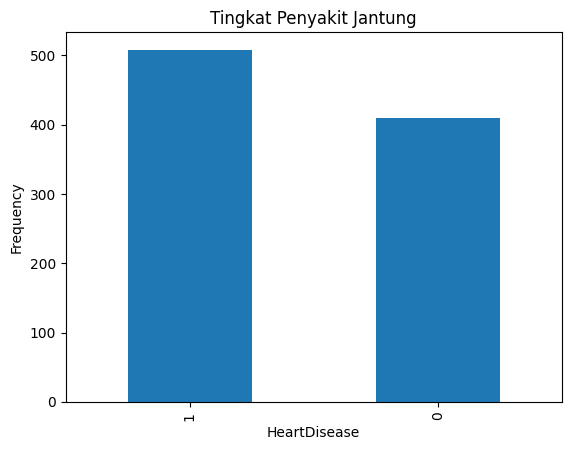

In [2]:
pd.value_counts(HeartDisease['Target']).plot.bar()
plt.title('Tingkat Penyakit Jantung')
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
HeartDisease['Target'].value_counts()

1    508
0    410
Name: Target, dtype: int64


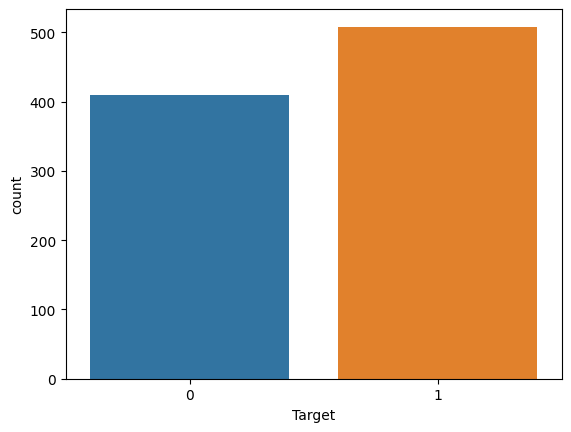

Persentase pasien tidak memiliki penyakit jantung: 44.66%
Persentase pasien memiliki penyakit jantung: 55.34%


In [3]:
print(HeartDisease.Target.value_counts())
sns.countplot(x="Target", data=HeartDisease)
plt.show()
countNoDisease = len(HeartDisease[HeartDisease.Target == 0])
countHaveDisease = len(HeartDisease[HeartDisease.Target == 1])
print("Persentase pasien tidak memiliki penyakit jantung: {:.2f}%".format((countNoDisease / (len(HeartDisease.Target))*100)))
print("Persentase pasien memiliki penyakit jantung: {:.2f}%".format((countHaveDisease / (len(HeartDisease.Target))*100)))

**CEK OUTLIER**

In [4]:
Q1Age = HeartDisease['Age'].quantile(.25) 
Q2Age = np.median(HeartDisease['Age'])
Q3Age = HeartDisease['Age'].quantile(.75)
IQRAge = Q3Age - Q1Age
print("Q1: ", Q1Age)
print("Q2 : ", Q2Age)
print("Q3: ", Q3Age)
print("IQR : ", IQRAge) 
# Menghitung nilai min dan max dari data 
nilai_minAge = np.min(HeartDisease['Age'])
nilai_maxAge = np.max(HeartDisease['Age'])
print("Data min : ", nilai_minAge)
print("Data max : ", nilai_maxAge)
# Hitung IQR minimum dan maksmim
min_IQRAge = Q1Age - 1.5 * IQRAge
max_IQRAge = Q3Age + 1.5 * IQRAge 
print("IQR min :", min_IQRAge)
print("IQR max : ",max_IQRAge)
#Outlier
if (nilai_minAge < min_IQRAge):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  
if (nilai_maxAge > max_IQRAge):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')
low_out = []
high_out = []
for i in HeartDisease['Age']:
    if (i < min_IQRAge):
        low_out.append(i)
    if (i > max_IQRAge):
        high_out.append(i)
print('Low outlier : ', low_out)
print('High outlier : ', high_out)

#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut Age: ", HeartDisease['Age'].shape)
HeartDiseaseAge = HeartDisease[~((HeartDisease['Age'] < (Q1Age - 1.5 * IQRAge)) | (HeartDisease['Age'] > (Q3Age + 1.5 * IQRAge)))]
#cek uk setelah data dibuang
print('Shape terakhir atribut Age: ', HeartDiseaseAge.shape)

Q1:  0.3877551020408163
Q2 :  0.5306122448979592
Q3:  0.6530612244897959
IQR :  0.26530612244897955
Data min :  0.0
Data max :  1.0
IQR min : -0.010204081632653017
IQR max :  1.0510204081632653
Tidak ditemukan low outlier!
Tidak ditemukan high outlier!
Low outlier :  []
High outlier :  []
Shape awal atribut Age:  (918,)
Shape terakhir atribut Age:  (918, 12)


In [5]:
# Cek IQR
Q1rbp = HeartDisease['RestingBP'].quantile(0.25)
Q3rbp = HeartDisease['RestingBP'].quantile(0.75)
IQrbp = Q3rbp - Q1rbp
print(IQrbp)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut RestingBP: ", HeartDisease['RestingBP'].shape)
#removing outlier
HeartDiseaseRBP = HeartDiseaseAge[~((HeartDiseaseAge['RestingBP'] < (Q1rbp - 1.5 * IQrbp)) | (HeartDiseaseAge['RestingBP'] > (Q3rbp+ 1.5 * IQrbp)))]
#cek uk setelah data dibuang
print('Shape awal atribut RestingBP: ', HeartDiseaseRBP.shape)

0.09999999999999998
Shape awal atribut RestingBP:  (918,)
Shape awal atribut RestingBP:  (876, 12)


In [6]:
# Cek IQR
Q1Cholesterol = HeartDisease['Cholesterol'].quantile(0.25)
Q3Cholesterol = HeartDisease['Cholesterol'].quantile(0.75)
IQRCholesterol = Q3Cholesterol - Q1Cholesterol
print(IQRCholesterol)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut Cholesterol : ", HeartDisease['Cholesterol'].shape)
#removing outlier
HeartDiseaseCholesterol = HeartDiseaseRBP[~((HeartDiseaseRBP['Cholesterol'] < (Q1Cholesterol  - 1.5 * IQRCholesterol)) | (HeartDiseaseRBP['Cholesterol'] > (Q3Cholesterol + 1.5 * IQRCholesterol)))]
#cek uk setelah data dibuang
print('Shape awal atribut Cholesterol : ', HeartDiseaseCholesterol.shape)

0.15547263681592038
Shape awal atribut Cholesterol :  (918,)
Shape awal atribut Cholesterol :  (703, 12)


In [7]:
# Cek IQR
Q1MaxHR = HeartDisease['MaxHR'].quantile(0.25)
Q3MaxHR = HeartDisease['MaxHR'].quantile(0.75)
IQRMaxHR = Q3MaxHR - Q1MaxHR
print(IQRMaxHR)
#Cek uk baris dan kolom sebelum data yang outlier dibuang
print("Shape awal atribut Height: ", HeartDisease['MaxHR'].shape)
#removing outlier
HeartDiseaseMaxHR = HeartDiseaseCholesterol[~((HeartDiseaseCholesterol['MaxHR'] < (Q1MaxHR  - 1.5 * IQRMaxHR)) | (HeartDiseaseCholesterol['MaxHR'] > (Q3MaxHR + 1.5 * IQRMaxHR)))]
#cek uk setelah data dibuang
print('Shape awal atribut Height: ', HeartDiseaseMaxHR.shape)

0.2535211267605634
Shape awal atribut Height:  (918,)
Shape awal atribut Height:  (703, 12)


In [8]:
HeartDisease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0


**CEK MISSING VALUE**

In [9]:
HeartDisease.to_csv('DataAwal.csv', index=False)

In [10]:
HeartDisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


In [11]:
#Mengecek apakah ada data yang kosong? Jika False artinya tidak terdapat data yang kosong 
HeartDisease.empty

False

In [12]:
HeartDisease.isna()
HeartDisease.notna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,True,True,True,True,True,True,True,True,True,True,True
914,True,True,True,True,True,True,True,True,True,True,True,True
915,True,True,True,True,True,True,True,True,True,True,True,True
916,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
HeartDisease.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
Target            False
dtype: bool

In [14]:
HeartDisease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

In [15]:
HeartDisease.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Target            0
dtype: int64

In [16]:
HeartDisease = HeartDisease.dropna(axis='rows')
HeartDisease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0


**MENAMPILKAN INFORMASI DATA**

In [17]:
HeartDisease.info() #Menampilkan informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  Target          918 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 86.2 KB


In [18]:
HeartDisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


**TRANSFORMASI DATA CATEGORIAL**

In [19]:
HeartDisease.to_csv('DataAwal.csv', index=False)

In [20]:
HeartDisease['Sex'] = HeartDisease['Sex'].astype('category')
HeartDisease['Sex'] = HeartDisease['Sex'].cat.codes

HeartDisease['ChestPainType'] = HeartDisease['ChestPainType'].astype('category')
HeartDisease['ChestPainType'] = HeartDisease['ChestPainType'].cat.codes

HeartDisease['FastingBS'] = HeartDisease['FastingBS'].astype('category')
HeartDisease['FastingBS'] = HeartDisease['FastingBS'].cat.codes

HeartDisease['RestingECG'] = HeartDisease['RestingECG'].astype('category')
HeartDisease['RestingECG'] = HeartDisease['RestingECG'].cat.codes

HeartDisease['ExerciseAngina'] = HeartDisease['ExerciseAngina'].astype('category')
HeartDisease['ExerciseAngina'] = HeartDisease['ExerciseAngina'].cat.codes

HeartDisease['ST_Slope'] = HeartDisease['ST_Slope'].astype('category')
HeartDisease['ST_Slope'] = HeartDisease['ST_Slope'].cat.codes

HeartDisease['Target'] = HeartDisease['Target'].astype('category')
HeartDisease['Target'] = HeartDisease['Target'].cat.codes

In [21]:
HeartDisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


**NORMALISASI DATA NUMERIK**

In [22]:
def MINMAX(x, XminB, XmaxB):
  min=np.min(x)
  max=np.max(x)

  for a in x:
    XB = ((x-min)/(max-min))*(XmaxB+XminB)
    return XB

cols_to_norm = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
HeartDisease[cols_to_norm] = HeartDisease[cols_to_norm].apply(lambda x: MINMAX(x,0,1))
HeartDisease[cols_to_norm]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.428571,0.80,0.298507,0.676056,0.409091
2,0.183673,0.65,0.469320,0.267606,0.295455
3,0.408163,0.69,0.354892,0.338028,0.465909
4,0.530612,0.75,0.323383,0.436620,0.295455
...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.507042,0.431818
914,0.816327,0.72,0.320066,0.570423,0.681818
915,0.591837,0.65,0.217247,0.387324,0.431818
916,0.591837,0.65,0.391376,0.802817,0.295455


In [23]:
numNew =  HeartDisease[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]
numDecimal = (round(numNew, 2))
print(numDecimal)

      Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0    0.24       0.70         0.48   0.79     0.30
1    0.43       0.80         0.30   0.68     0.41
2    0.18       0.65         0.47   0.27     0.30
3    0.41       0.69         0.35   0.34     0.47
4    0.53       0.75         0.32   0.44     0.30
..    ...        ...          ...    ...      ...
913  0.35       0.55         0.44   0.51     0.43
914  0.82       0.72         0.32   0.57     0.68
915  0.59       0.65         0.22   0.39     0.43
916  0.59       0.65         0.39   0.80     0.30
917  0.20       0.69         0.29   0.80     0.30

[918 rows x 5 columns]


In [24]:
# HeartDisease
data = HeartDisease.sort_values('Target')
data1 = display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.700,0.479270,0,1,0.788732,0,0.295455,2,0
620,0.755102,1,0,0.600,0.293532,0,1,0.563380,0,0.340909,2,0
619,0.938776,0,1,0.600,0.446103,0,0,0.429577,1,0.318182,2,0
618,0.734694,1,0,0.640,0.436153,0,1,0.316901,1,0.318182,1,0
616,0.795918,0,2,0.575,0.935323,0,0,0.704225,0,0.477273,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.428571,1,3,0.650,0.000000,0,2,0.598592,0,0.636364,1,1
493,0.469388,1,2,0.685,0.562189,0,1,0.471831,1,0.488636,1,1
494,0.653061,1,0,0.710,0.358209,0,1,0.352113,1,0.579545,1,1
485,0.714286,1,1,0.695,0.359867,1,2,0.478873,1,0.431818,1,1


In [25]:
HeartDisease.to_csv('DataAwal.csv', index=False)

**MENGHITUNG RATA-RATA KELAS (TARGET)**

In [26]:
HeartDisease.groupby('Target').mean()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
Target,,,,,,,,,,,
0,0.460229,0.651220,1.192683,0.650902,0.376653,0.107317,0.948780,0.620783,0.134146,0.341824,1.739024
1,0.569380,0.901575,0.448819,0.670925,0.291776,0.334646,1.021654,0.476447,0.622047,0.440251,1.057087


**MENAMPILKAN FREKUENSI DATA UMUR PADA TIAP KELAS**

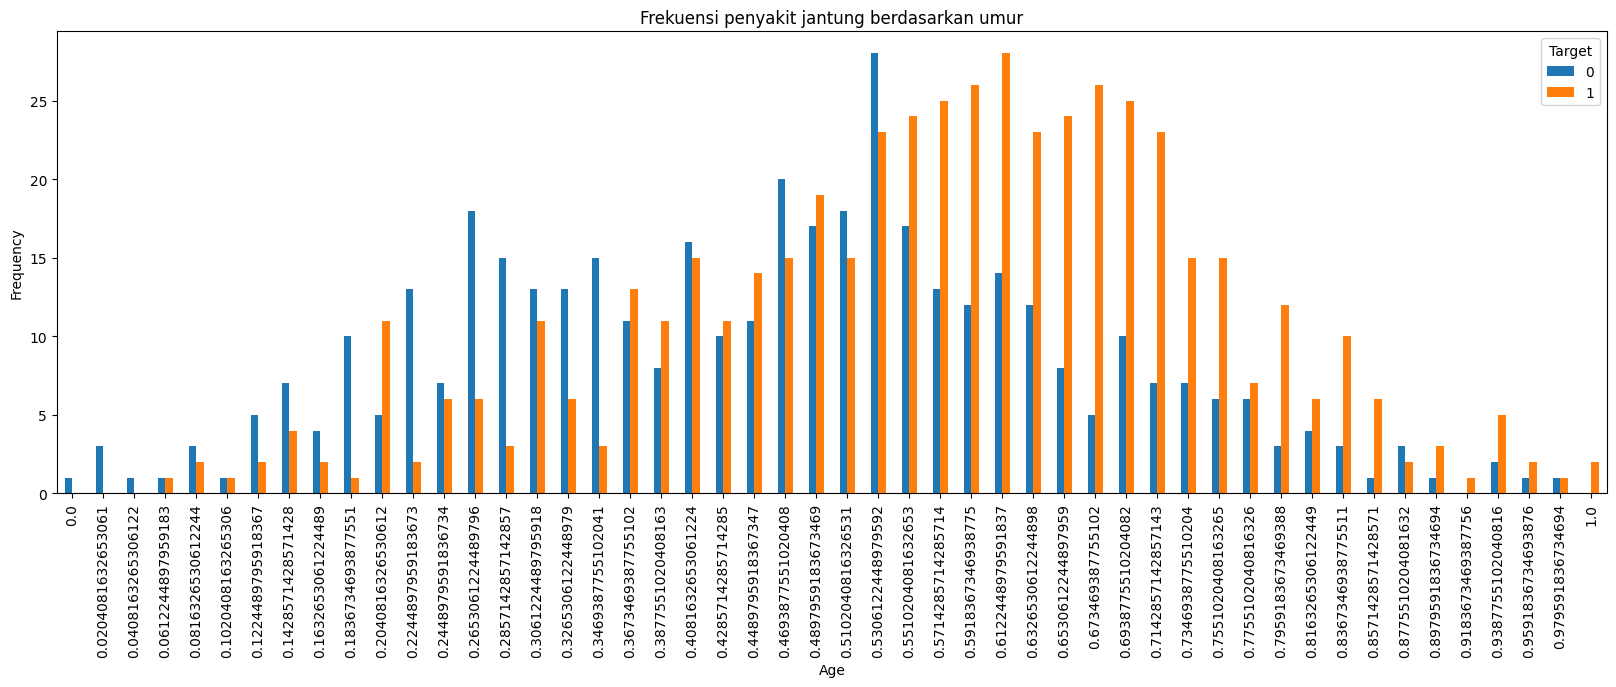

In [27]:
pd.crosstab(HeartDisease.Age,HeartDisease.Target).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi penyakit jantung berdasarkan umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

**MENAMPILKAN DETAK JANTUNG MAKSIMUM UMUR PADA KELAS**

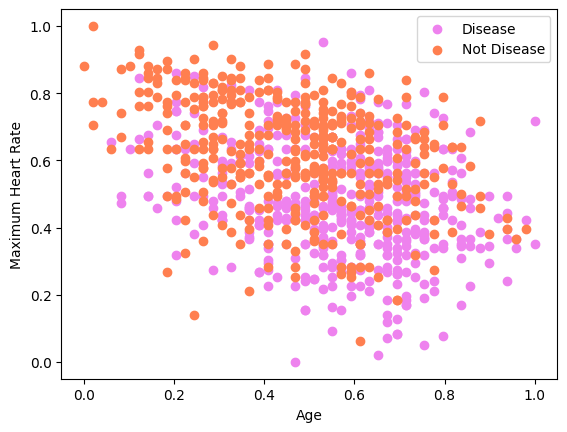

In [28]:
plt.scatter(x=HeartDisease.Age[HeartDisease.Target==1], y=HeartDisease.MaxHR[(HeartDisease.Target==1)], c="violet")
plt.scatter(x=HeartDisease.Age[HeartDisease.Target==0], y=HeartDisease.MaxHR[(HeartDisease.Target==0)], c ="coral")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [29]:
HeartDisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


**PERHITUNGAN R-SQUARE**

In [30]:
HeartDisease.sum()

Age                477.938776
Sex                725.000000
ChestPainType      717.000000
RestingBP          607.700000
Cholesterol        302.650083
FastingBS          214.000000
RestingECG         908.000000
MaxHR              496.556338
ExerciseAngina     371.000000
Oldpeak            363.795455
ST_Slope          1250.000000
Target             508.000000
dtype: float64

In [31]:
from cmath import sqrt

x_pred = HeartDisease['Age']
y_pred = HeartDisease ['Target']
xy = (x_pred * y_pred).sum()
x = HeartDisease['Age'].sum()
y = HeartDisease['Target'].sum()
x2 = (HeartDisease['Age'] * HeartDisease['Age']).sum()
y2 = (HeartDisease['Target'] * HeartDisease['Target']).sum()


r1 = 918 * xy - x * y
r2 = (918 * x2 - x * x)
r3 = (918 * y2 - y * y)
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_age = r * r
R_age

(0.07954571876461211+0j)

In [32]:
x_pred = HeartDisease['Sex']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['Sex'].sum()
x
y = HeartDisease['Target'].sum()
y
x2 = HeartDisease['Sex'] * HeartDisease['Sex']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_sex = r * r
R_sex

(0.09329659668773009+0j)

In [33]:
x_pred = HeartDisease['ChestPainType']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['ChestPainType'].sum()
x
y = HeartDisease['Target'].sum()
y
x2 = HeartDisease['ChestPainType'] * HeartDisease['ChestPainType']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_cpt = r * r
R_cpt

(0.14963566504849218-0j)

In [34]:
x_pred = HeartDisease['RestingBP']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['RestingBP'].sum()
x
y = HeartDisease['Target'].sum()
y
x2 = HeartDisease['RestingBP'] * HeartDisease['RestingBP']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_rbp = r * r
R_rbp

(0.011575388697358578+0j)

In [35]:
x_pred = HeartDisease['Cholesterol']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['Cholesterol'].sum()
x
y = HeartDisease['Target'].sum()
y
x2 = HeartDisease['Cholesterol'] * HeartDisease['Cholesterol']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_chl = r * r
R_chl

(0.05416820500815345-0j)

In [36]:
x_pred = HeartDisease['FastingBS']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['FastingBS'].sum()
x
y = HeartDisease['Target'].sum()
y
x2 = HeartDisease['FastingBS'] * HeartDisease['FastingBS']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_fbs = r * r
R_fbs

(0.07144457817225+0j)

In [37]:
x_pred = HeartDisease['RestingECG']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['RestingECG'].sum()
x
y = HeartDisease['Target'].sum()
y
x2 = HeartDisease['RestingECG'] * HeartDisease['RestingECG']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_RECG = r * r
R_RECG

(0.0032929644298472175+0j)

In [38]:
x_pred = HeartDisease['MaxHR']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['MaxHR'].sum()
y = HeartDisease['Target'].sum()
x2 = HeartDisease['MaxHR'] * HeartDisease['MaxHR']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()

r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_MaxHR = r * r
R_MaxHR

(0.16033679261749323-0j)

In [39]:
x_pred = HeartDisease['ExerciseAngina']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['ExerciseAngina'].sum()
y = HeartDisease['Target'].sum()
x2 = HeartDisease['ExerciseAngina'] * HeartDisease['ExerciseAngina']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()
 
r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_EA = r * r
R_EA

(0.24431468744176615+0j)

In [40]:
x_pred = HeartDisease['Oldpeak']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['Oldpeak'].sum()
y = HeartDisease['Target'].sum()
x2 = HeartDisease['Oldpeak'] * HeartDisease['Oldpeak']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()
 
r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_Op = r * r
R_Op

(0.1631761858551273+0j)

In [41]:
x_pred = HeartDisease['ST_Slope']
y_pred = HeartDisease ['Target']
xy = x_pred * y_pred
xy.sum()
x = HeartDisease['ST_Slope'].sum()
y = HeartDisease['Target'].sum()
x2 = HeartDisease['ST_Slope'] * HeartDisease['ST_Slope']
x2.sum()
y2 = HeartDisease['Target'] * HeartDisease['Target']
y2.sum()
 
r1 = 918 * xy.sum() - x * y
r2 = 918 * x2.sum() - x * x
r3 = 918 * y2.sum() - y * y
r4 = sqrt(r2) * sqrt(r3)
r = r1 / r4
R_ST = r * r
R_ST

(0.3122247117736514-0j)

In [42]:
print("Nilai Korelasi R-Square atribut Age           : ",R_age)
print("Nilai Korelasi R-Square atribut Sex           : ", R_sex)
print("Nilai Korelasi R-Square atribut ChestPainType : ", R_cpt)
print("Nilai Korelasi R-Square atribut RestingBP     : ", R_rbp)
print("Nilai Korelasi R-Square atribut Cholesterol   : ", R_chl)
print("Nilai Korelasi R-Square atribut FastingBS     : ", R_fbs)
print("Nilai Korelasi R-Square atribut RestingECG    : ", R_RECG)
print("Nilai Korelasi R-Square atribut MaxHR         : ", R_MaxHR)
print("Nilai Korelasi R-Square atribut ExerciseAngina: ", R_EA)
print("Nilai Korelasi R-Square atribut Oldpeak       : ", R_Op)
print("Nilai Korelasi R-Square atribut ST_Slope      : ", R_ST)

Nilai Korelasi R-Square atribut Age           :  (0.07954571876461211+0j)
Nilai Korelasi R-Square atribut Sex           :  (0.09329659668773009+0j)
Nilai Korelasi R-Square atribut ChestPainType :  (0.14963566504849218-0j)
Nilai Korelasi R-Square atribut RestingBP     :  (0.011575388697358578+0j)
Nilai Korelasi R-Square atribut Cholesterol   :  (0.05416820500815345-0j)
Nilai Korelasi R-Square atribut FastingBS     :  (0.07144457817225+0j)
Nilai Korelasi R-Square atribut RestingECG    :  (0.0032929644298472175+0j)
Nilai Korelasi R-Square atribut MaxHR         :  (0.16033679261749323-0j)
Nilai Korelasi R-Square atribut ExerciseAngina:  (0.24431468744176615+0j)
Nilai Korelasi R-Square atribut Oldpeak       :  (0.1631761858551273+0j)
Nilai Korelasi R-Square atribut ST_Slope      :  (0.3122247117736514-0j)


**PERHITUNGAN PRIOR PROBABILITY**

In [43]:
list_kelas = np.unique(HeartDisease['Target'])
list_prior = np.zeros(len(list_kelas))
jumlah_instance = len(HeartDisease)

i = 0
while i < len(list_kelas):
    kelas_cek = list_kelas[i]
    j = 0
    jumlah_kelas_muncul = 0
    while j < jumlah_instance:
        kelas_tercek = HeartDisease['Target'].iloc[j]
        if kelas_cek == kelas_tercek:
            jumlah_kelas_muncul += 1
        j += 1
    prior_prob = jumlah_kelas_muncul / jumlah_instance
    list_prior[i] = prior_prob
    i += 1
print (list_prior)

[0.44662309 0.55337691]


**PERHITUNGAN PROBABILITAS**

In [44]:
X = HeartDisease.drop(columns='Target') 
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2


In [45]:
y = HeartDisease['Target'] 
y.head() 

0    0
1    1
2    0
3    1
4    0
Name: Target, dtype: int8

In [46]:
total = HeartDisease.groupby('Age')['Target'].count()
total

Age
0.000000     1
0.020408     3
0.040816     1
0.061224     2
0.081633     5
0.102041     2
0.122449     7
0.142857    11
0.163265     6
0.183673    11
0.204082    16
0.224490    15
0.244898    13
0.265306    24
0.285714    18
0.306122    24
0.326531    19
0.346939    18
0.367347    24
0.387755    19
0.408163    31
0.428571    21
0.448980    25
0.469388    35
0.489796    36
0.510204    33
0.530612    51
0.551020    41
0.571429    38
0.591837    38
0.612245    42
0.632653    35
0.653061    32
0.673469    31
0.693878    35
0.714286    30
0.734694    22
0.755102    21
0.775510    13
0.795918    15
0.816327    10
0.836735    13
0.857143     7
0.877551     5
0.897959     4
0.918367     1
0.938776     7
0.959184     3
0.979592     2
1.000000     2
Name: Target, dtype: int64

In [47]:
HeartDisease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


In [48]:
# cari = HeartDisease.drop['Target'], axis = 0
# cari.head()

In [49]:
color_or_shape = len(HeartDisease.loc[(HeartDisease['Sex'] == 1) & (HeartDisease['Target'] == 0)])
print (color_or_shape)

267


In [57]:
len(HeartDisease.loc[(HeartDisease['Sex'] == 0) & (HeartDisease['Target'] == 0)])

143

**NAIVE BAYES**

In [51]:
import nltk
from sklearn.model_selection import train_test_split # Import train_test_split_function
from sklearn.naive_bayes import GaussianNB #import Gaussian Naive Bayes model

X = HeartDisease.drop('Target', axis=1) 
Y = np.array(HeartDisease['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state =8, shuffle=True)
#X_train dan y_traing untuk training, X_test dan y_test untuk testing model 
# membagi dataset menjadi 90% training dan 10% test set
 
gnb = GaussianNB() #baca/membuat fungsi Gaussian Classifier

gnb.fit(X_train, y_train) #Memasukkan data training pada fungsi klasifikasi naive bayes 
y_pred = gnb.predict(X_test) #Menentukan hasil prediksi dari x_text
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1], dtype=int8)

In [52]:
# =============================================================NO====================================================================================================
print("============================NO=============================")
numNo = HeartDisease.loc[HeartDisease["Target"] == 0] 
numNo

meanAge = np.mean(numNo['Age'])
print("Mean Age : ",meanAge)
varianceAge = np.var(numNo['Age']) #Menghitung varians
stdAge = np.std(numNo['Age'])
print("Standar deviasi Age : ",stdAge)
def calculateProbabilityAgeKurang(X_test, meanAge, stdAge):
  exponent = math.exp(-(math.pow(X_test-meanAge,2)/(2*math.pow(stdAge,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanRBP = np.mean(numNo['RestingBP'])
print()
print("Mean RestingBP : ",meanRBP)
varianceRBP = np.var(numNo['RestingBP']) #Menghitung varians
stdRBP = np.std(numNo['RestingBP'])
print("Standar Deviasi RestingBP : ",stdRBP)
def calculateProbabilityHeightKurang(X_test, meanRBP, stdRBP):
  exponent = math.exp(-(math.pow(X_test-meanRBP,2)/(2*math.pow(stdRBP,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanCHL = np.mean(numNo['Cholesterol'])
print()
print("Mean Cholesterol : ",meanCHL)
varianceCHL = np.var(numNo['Cholesterol']) #Menghitung varians
stdCHL = np.std(numNo['Cholesterol'])
print("Standar Deviasi Cholesterol :",stdCHL)
def calculateProbabilityWeightKurang(X_test, meanCHL, stdCHL):
  exponent = math.exp(-(math.pow(X_test-meanCHL,2)/(2*math.pow(stdCHL,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanMaxHR = np.mean(numNo['MaxHR'])
print()
print("Mean MaxHR : ",meanMaxHR)
varianceMaxHR = np.var(numNo['MaxHR']) #Menghitung varians
stdMaxHR = np.std(numNo['MaxHR'])
print("Standar Deviasi MaxHR :",stdMaxHR)
def calculateProbabilityWeightKurang(X_test, meanMaxHR, stdMaxHR):
  exponent = math.exp(-(math.pow(X_test-meanMaxHR,2)/(2*math.pow(stdMaxHR,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanOldpeak = np.mean(numNo['Oldpeak'])
print()
print("Mean Oldpeak : ",meanOldpeak)
varianceOldpeak = np.var(numNo['Oldpeak']) #Menghitung varians
stdOldpeak = np.std(numNo['Oldpeak'])
print("Standar Deviasi Oldpeak :",stdOldpeak)
def calculateProbabilityWeightKurang(X_test, meanOldpeak, stdOldpeak):
  exponent = math.exp(-(math.pow(X_test-meanOldpeak,2)/(2*math.pow(stdOldpeak,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

# =============================================================YES====================================================================================================
print("============================YES=============================")
numYes = HeartDisease.loc[HeartDisease["Target"] == 1] 
numYes

meanAge = np.mean(numYes['Age'])
print("Mean Age : ",meanAge)
varianceAge = np.var(numYes['Age']) #Menghitung varians
stdAge = np.std(numYes['Age'])
print("Standar deviasi Age : ",stdAge)
def calculateProbabilityAgeKurang(X_test, meanAge, stdAge):
  exponent = math.exp(-(math.pow(X_test-meanAge,2)/(2*math.pow(stdAge,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanRBP = np.mean(numYes['RestingBP'])
print()
print("Mean RestingBP : ",meanRBP)
varianceRBP = np.var(numYes['RestingBP']) #Menghitung varians
stdRBP = np.std(numYes['RestingBP'])
print("Standar Deviasi RestingBP : ",stdRBP)
def calculateProbabilityHeightKurang(X_test, meanRBP, stdRBP):
  exponent = math.exp(-(math.pow(X_test-meanRBP,2)/(2*math.pow(stdRBP,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanCHL = np.mean(numYes['Cholesterol'])
print()
print("Mean Cholesterol : ",meanCHL)
varianceCHL = np.var(numYes['Cholesterol']) #Menghitung varians
stdCHL = np.std(numYes['Cholesterol'])
print("Standar Deviasi Cholesterol :",stdCHL)
def calculateProbabilityWeightKurang(X_test, meanCHL, stdCHL):
  exponent = math.exp(-(math.pow(X_test-meanCHL,2)/(2*math.pow(stdCHL,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanMaxHR = np.mean(numYes['MaxHR'])
print()
print("Mean MaxHR : ",meanMaxHR)
varianceMaxHR = np.var(numYes['MaxHR']) #Menghitung varians
stdMaxHR = np.std(numYes['MaxHR'])
print("Standar Deviasi MaxHR :",stdMaxHR)
def calculateProbabilityWeightKurang(X_test, meanMaxHR, stdMaxHR):
  exponent = math.exp(-(math.pow(X_test-meanMaxHR,2)/(2*math.pow(stdMaxHR,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent

meanOldpeak = np.mean(numYes['Oldpeak'])
print()
print("Mean Oldpeak : ",meanOldpeak)
varianceOldpeak = np.var(numYes['Oldpeak']) #Menghitung varians
stdOldpeak = np.std(numYes['Oldpeak'])
print("Standar Deviasi Oldpeak :",stdOldpeak)
def calculateProbabilityWeightKurang(X_test, meanOldpeak, stdOldpeak):
  exponent = math.exp(-(math.pow(X_test-meanOldpeak,2)/(2*math.pow(stdOldpeak,2))))
  return (1/(math.sqrt((2*math.pi)*std)))*exponent


============================NO=============================
Mean Age :  0.4602289696366352
Standar deviasi Age :  0.19251815578439396

Mean RestingBP :  0.6509024390243903
Standar Deviasi RestingBP :  0.08239725453573542

Mean Cholesterol :  0.37665331877199365
Standar Deviasi Cholesterol : 0.12362120275395808

Mean MaxHR :  0.6207832360013741
Standar Deviasi MaxHR : 0.16380034619026582

Mean Oldpeak :  0.34182372505543235
Standar Deviasi Oldpeak : 0.07941536698597841
============================YES=============================
Mean Age :  0.5693797203920938
Standar deviasi Age :  0.17792779006953716

Mean RestingBP :  0.6709251968503936
Standar Deviasi RestingBP :  0.09904579348785296

Mean Cholesterol :  0.29177602799650043
Standar Deviasi Cholesterol : 0.20939790319270093

Mean MaxHR :  0.4764472662748142
Standar Deviasi MaxHR : 0.16453445612674739

Mean Oldpeak :  0.44025143163922686
Standar Deviasi Oldpeak : 0.13076564577413524


In [53]:
SexMaleYes = 0; SexMaleNo = 0
SexFemaleYes = 0; SexFemaleNo = 0
Iya = 0; Tidak = 0
# inisialisasi nilai awal dengan 0 untuk varaibel jenis kelamin

# untuk row1 dan row2 adalah sebuah iterable dari iterables Gender dan Nobeyesdad
for (row1, row2) in zip(HeartDisease.Sex, HeartDisease.Target):
 if (row1 == 1 and row2 == 0):  # row1 adalah nilai setiap atribut yang ada di variabel Gender, sedangkan row2 adalah nilai setiap atribute yang ada di NObeyesdad
    SexMaleYes += 1  # apakah row1 memuat Female dan row2 memuat Insufficient_weight? Jika ya tambahkan nilai komulatif untuk FemaleI dan Insufficient_weight dengan 1
    Iya += 1
 elif (row1 == 1 and row2 == 1):
   SexMaleNo += 1
   Tidak += 1
 elif (row1 == 0 and row2 == 0):
    SexFemaleYes += 1
    Iya += 1
 elif (row1 == 0 and row2 == 1):
    SexFemaleNo += 1
    Tidak += 1

TotalYes = Iya  # Menyinpan variabel IYA ke totalYes
TotalNo = Tidak  # Menyimpan variabel No ke totalNo
Total = TotalYes + TotalNo

probSexMaleYes = ((1+SexMaleYes)/TotalYes)
probSexMaleNo = ((1+SexMaleNo)/TotalNo)
probSexFemaleYes = ((1+SexFemaleYes)/TotalYes)
probSexFemaleNo = ((1+SexFemaleNo)/TotalNo) 

SexMaleYes = 0; SexMaleNo = 0
SexFemaleYes = 0; SexFemaleNo = 0
Iya = 0; Tidak = 0
# inisialisasi nilai awal dengan 0 untuk variabel jenis kelamin

#===========================================================================================================================
cptASYyes = 0; cptASYno = 0
cptATAyes = 0; cptATAno = 0
cptNAPyes = 0; cptNAPno = 0
cptTAyes = 0; cptTAno = 0

for (row1, row2) in zip(HeartDisease.ChestPainType, HeartDisease.Target):
 if (row1 == 0 and row2 == 0):  
    cptASYyes += 1 
    Iya += 1
 elif (row1 == 0 and row2 == 1):
   cptASYno += 1
   Tidak += 1

 elif (row1 == 1 and row2 == 0):
    cptATAyes += 1
    Iya += 1
 elif (row1 == 1 and row2 == 1):
    cptATAno += 1
    Tidak += 1

 elif (row1 == 2 and row2 == 0):
    cptNAPyes += 1
    Iya += 1
 elif (row1 == 2 and row2 == 1):
    cptNAPno += 1
    Tidak += 1

 elif (row1 == 3 and row2 == 0):
    cptTAyes += 1
    Iya += 1
 elif (row1 == 3 and row2 == 1):
    cptTAno += 1
    Tidak += 1

probCPTasyYES = ((1+cptASYyes)/TotalYes)
probCPTasyNO = ((1+cptASYno)/TotalNo)

probCPTataYES = ((1+cptATAyes)/TotalYes)
probCPTataNO = ((1+cptATAno)/TotalNo)

probCPTnapYES = ((1+cptNAPyes)/TotalNo)
probCPTnapNO =((1+cptATAno)/TotalYes)

probCPTtaYES = ((1+cptTAyes)/TotalYes)
probCPTtaNO = ((1+cptTAno)/TotalNo)

#===========================================================================================================================
recgLVHYES = 0; recgLVHNO = 0
recgNormalYES = 0; recgNormalNO = 0
recgSTYES = 0; recgSTNO = 0

for (row1, row2) in zip(HeartDisease.RestingECG, HeartDisease.Target):
 if (row1 == 0 and row2 == 0):  
    recgLVHYES += 1 
    Iya += 1
 elif (row1 == 0 and row2 == 1):
   recgLVHNO += 1
   Tidak += 1

 elif (row1 == 1 and row2 == 0):
    recgNormalYES += 1
    Iya += 1
 elif (row1 == 1 and row2 == 1):
    recgNormalNO += 1
    Tidak += 1

 elif (row1 == 2 and row2 == 0):
    recgSTYES += 1
    Iya += 1
 elif (row1 == 2 and row2 == 1):
    recgNormalNO += 1
    Tidak += 1

probRECGnormalYES = ((1+recgNormalYES)/TotalYes)
probRECGnormalNO = ((1+recgNormalNO)/TotalNo)

probRECGstYES = ((1+recgSTYES)/TotalYes)
probRECGstNO = ((1+recgSTNO)/TotalNo)

probRECGlvhYES = ((1+recgLVHYES)/TotalYes)
probRECGlvhNO = ((1+recgLVHNO)/TotalNo)

#===========================================================================================================================
EAyYES = 0; EAnNO = 0
EAnYES = 0; EAnNO = 0

for (row1, row2) in zip(HeartDisease.ExerciseAngina, HeartDisease.Target):
 if (row1 == 0 and row2 == 0):  
    EAyYES += 1 
    Iya += 1
 elif (row1 == 0 and row2 == 1):
   EAnNO += 1
   Tidak += 1

 elif (row1 == 1 and row2 == 0):
    EAnYES += 1
    Iya += 1
 elif (row1 == 1 and row2 == 1):
    EAnNO += 1
    Tidak += 1

probEAyYES = ((1+recgNormalYES)/TotalYes)
probEAnNO = ((1+recgNormalNO)/TotalNo)

probEAnYES = ((1+recgSTYES)/TotalYes)
probEAnNO = ((1+recgSTNO)/TotalNo)

#===========================================================================================================================
STdownYES = 0; STdownNO = 0
STflatYES = 0; STflatNO = 0
STupYES = 0; STupNO = 0

for (row1, row2) in zip(HeartDisease.ST_Slope, HeartDisease.Target):
 if (row1 == 0 and row2 == 0):  
    STdownYES += 1 
    Iya += 1
 elif (row1 == 0 and row2 == 1):
   STdownNO += 1
   Tidak += 1

 elif (row1 == 1 and row2 == 0):
    STflatYES += 1
    Iya += 1
 elif (row1 == 1 and row2 == 1):
    STflatNO += 1
    Tidak += 1

 elif (row1 == 2 and row2 == 0):
    STupYES += 1
    Iya += 1
 elif (row1 == 2 and row2 == 1):
    STupNO += 1
    Tidak += 1

probSTdownYES = ((1+STdownYES)/TotalYes)
probSTdownNO = ((1+STdownNO)/TotalNo)

probSTflatYES = ((1+STflatYES)/TotalYes)
probSTflatNO = ((1+STflatNO)/TotalNo)

probSTupYES = ((1+STupYES)/TotalYes)
probSTupNO = ((1+STupNO)/TotalNo)

probTotalYes = TotalYes/Total
probTotalNo = TotalNo/Total